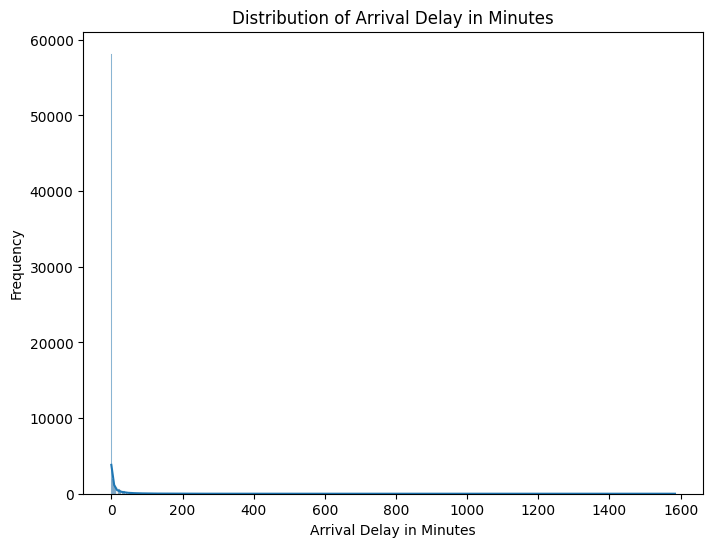

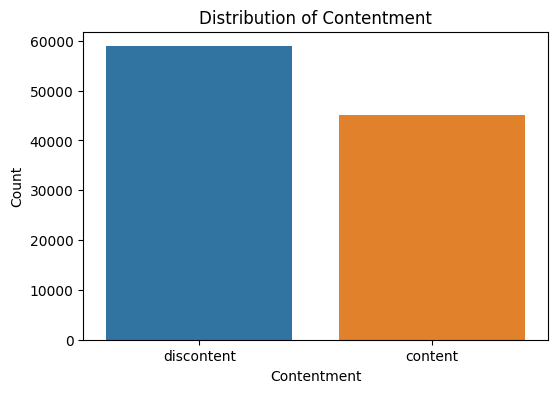

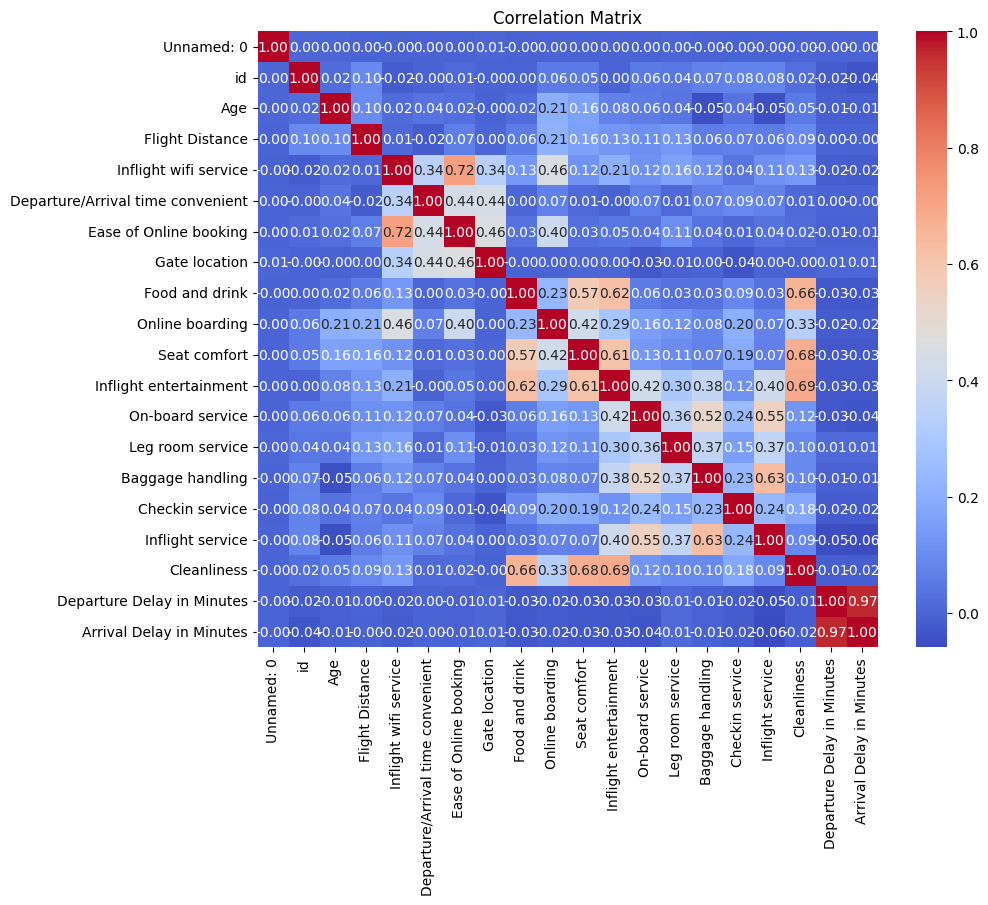

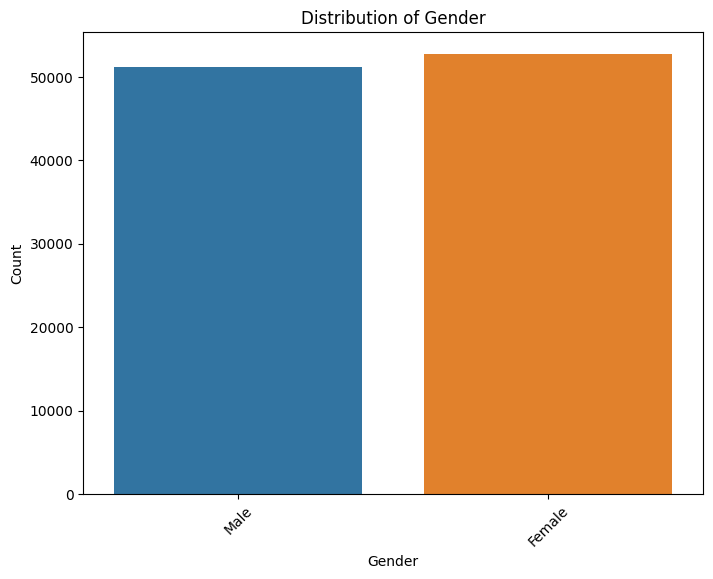

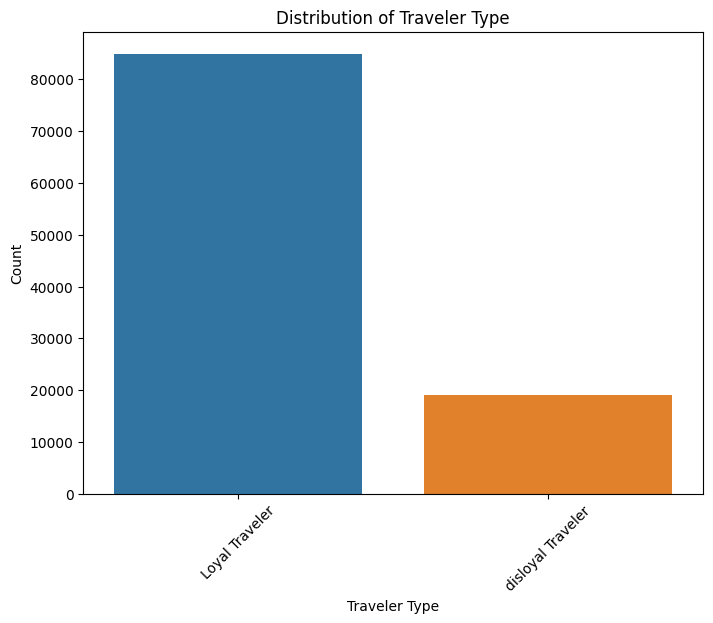

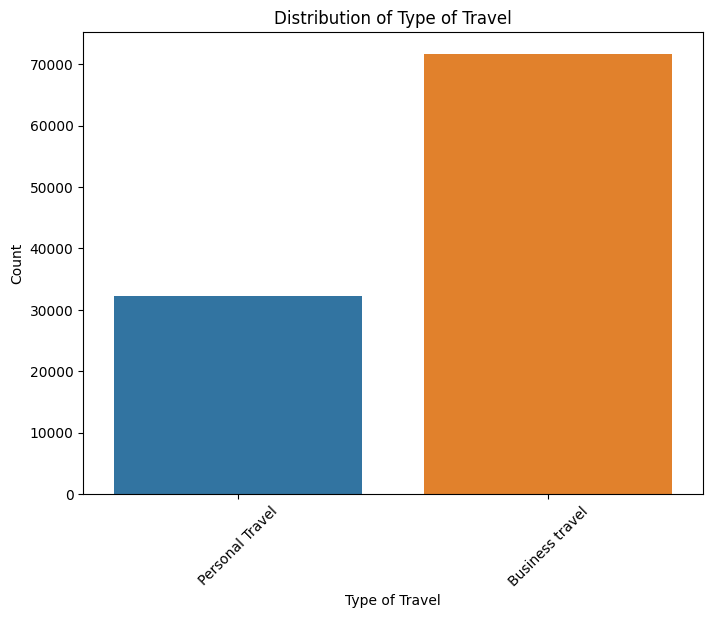

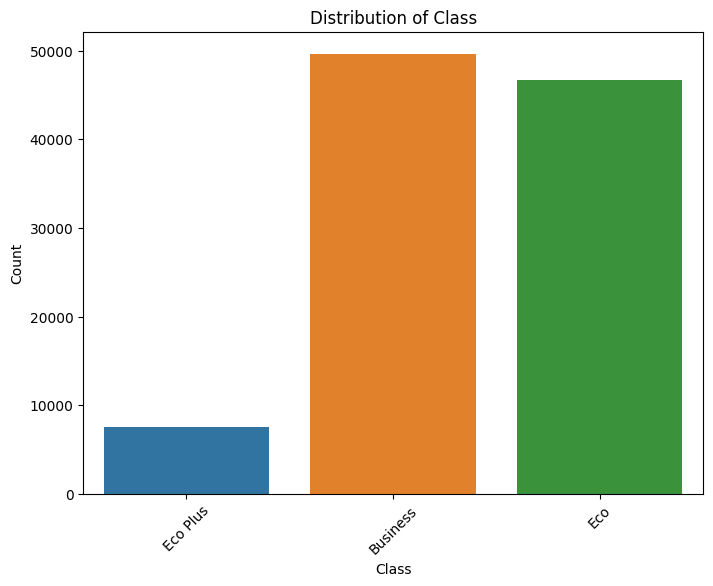

In [18]:
# IMT2021045 Goutham U R
# IMT2021077 Nimish K
# IMT2021080 Pannaga Bhat


#Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns

#EDA

# Load the training data
train_data = pd.read_csv('/kaggle/input/foreseeing-traveler-contentment/train.csv')

# Visualize the distribution of the 'Arrival Delay in Minutes' column
plt.figure(figsize=(8, 6))
sns.histplot(train_data['Arrival Delay in Minutes'], kde=True)
plt.title("Distribution of Arrival Delay in Minutes")
plt.xlabel("Arrival Delay in Minutes")
plt.ylabel("Frequency")
plt.show()

# Visualize the distribution of the 'contentment' column
plt.figure(figsize=(6, 4))
sns.countplot(data=train_data, x='contentment')
plt.title("Distribution of Contentment")
plt.xlabel("Contentment")
plt.ylabel("Count")
plt.show()

# Exclude non-numeric columns for correlation analysis
numerical_columns = train_data.select_dtypes(include=['int64', 'float64']).columns

# Explore relationships between numerical variables (e.g., correlation)
correlation_matrix = train_data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Visualize categorical variables
categorical_columns = ['Gender', 'Traveler Type', 'Type of Travel', 'Class']

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=train_data, x=column)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

Box Plots

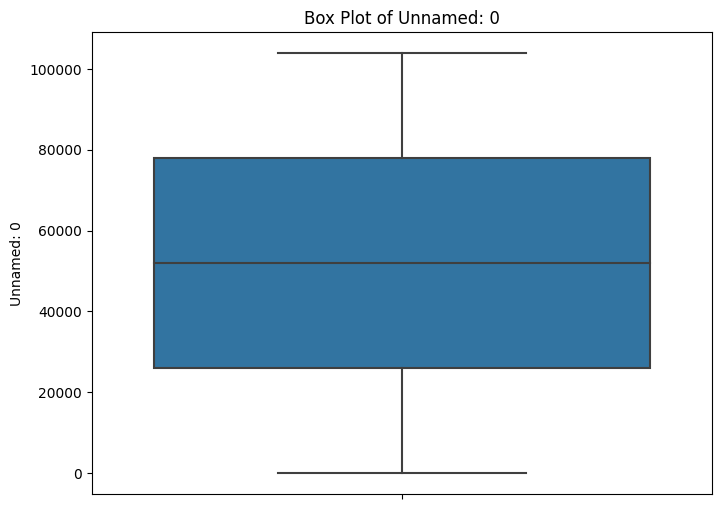

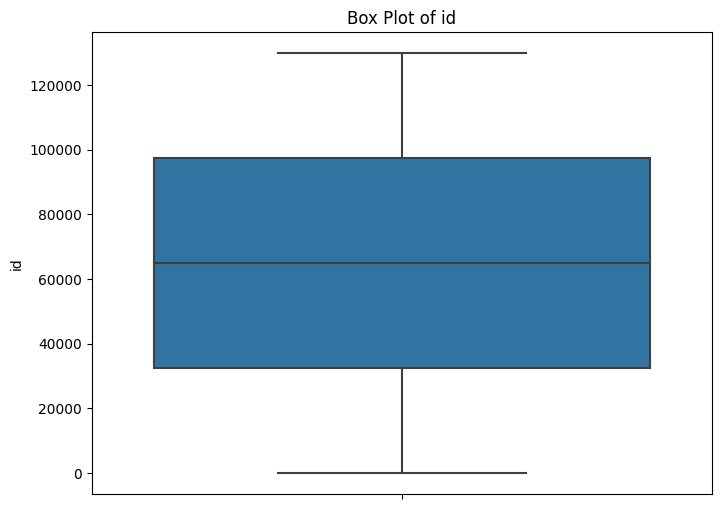

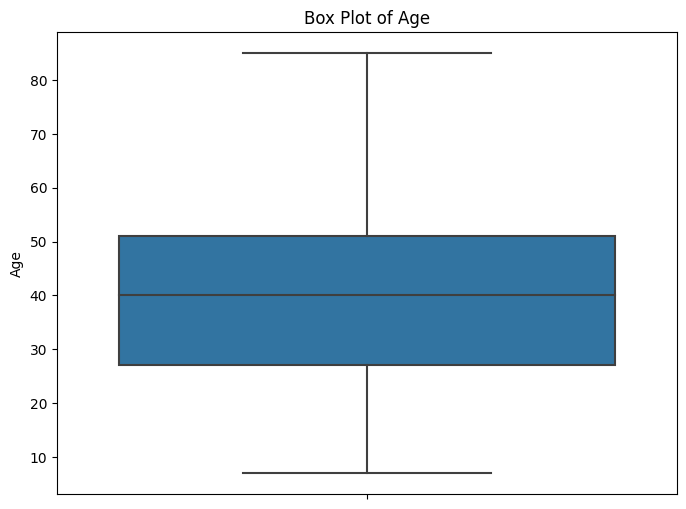

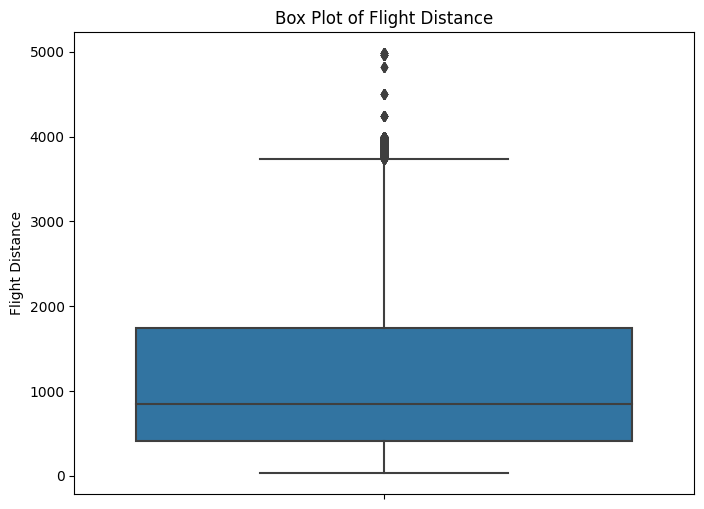

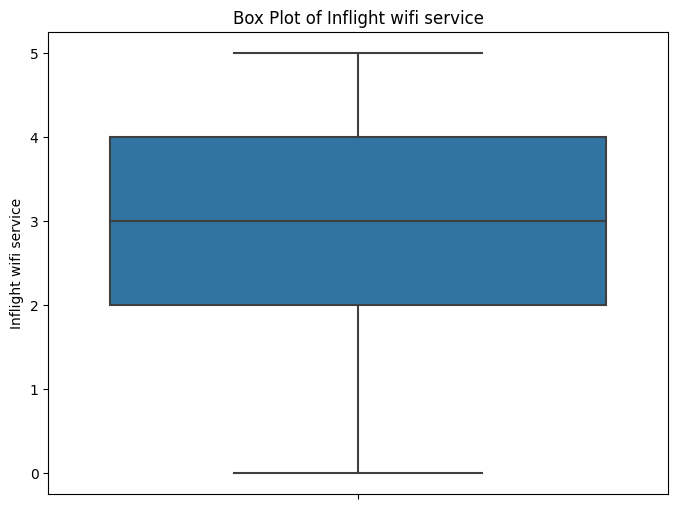

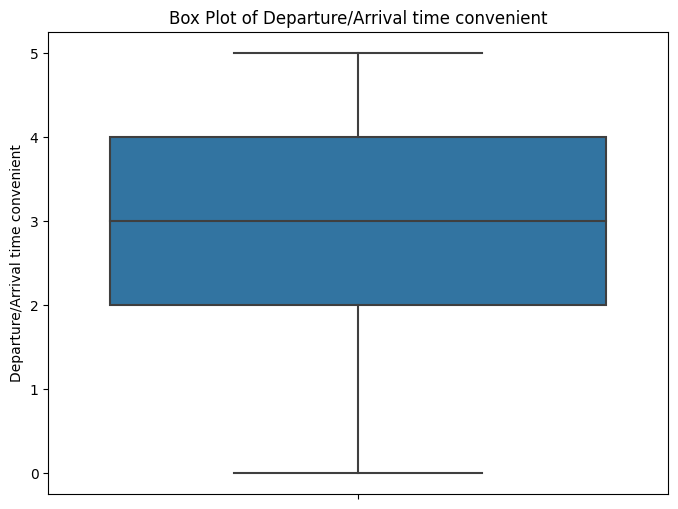

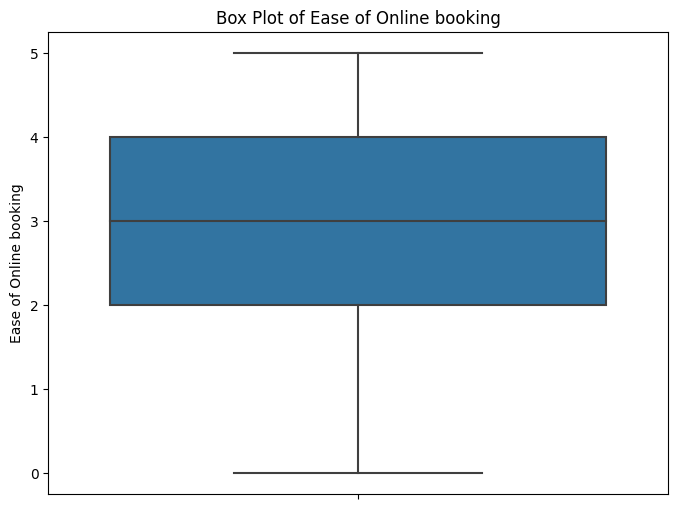

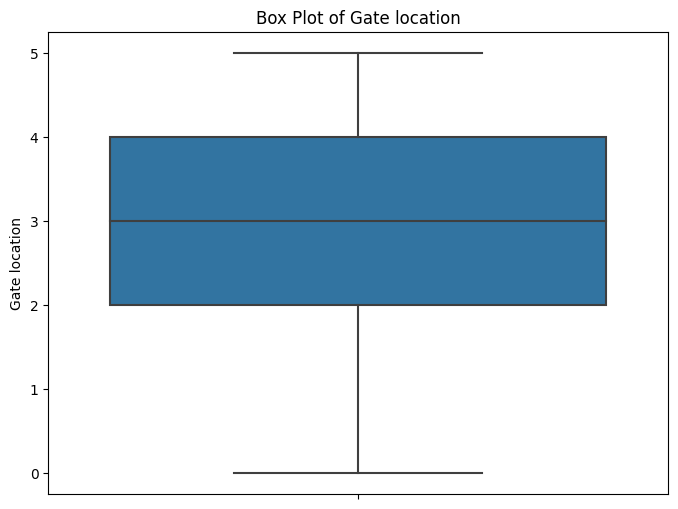

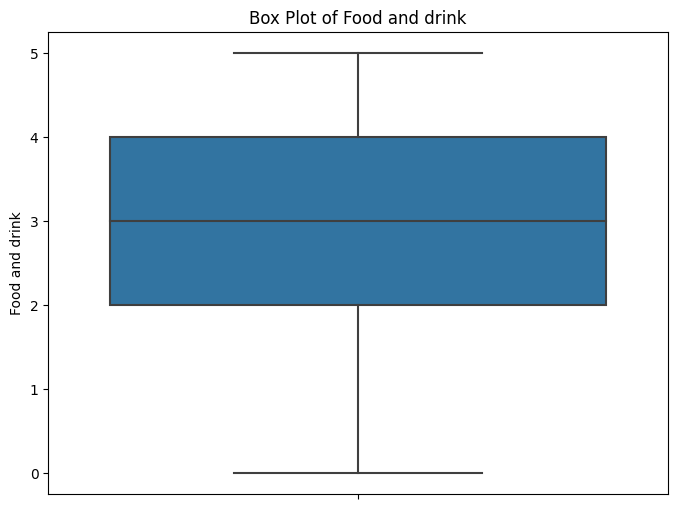

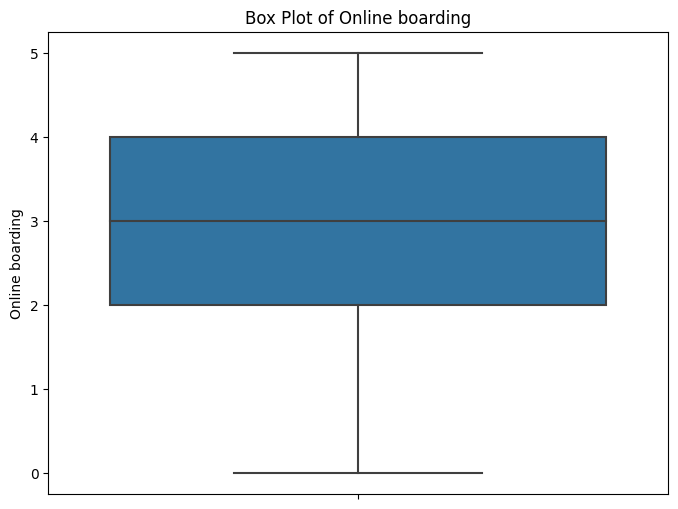

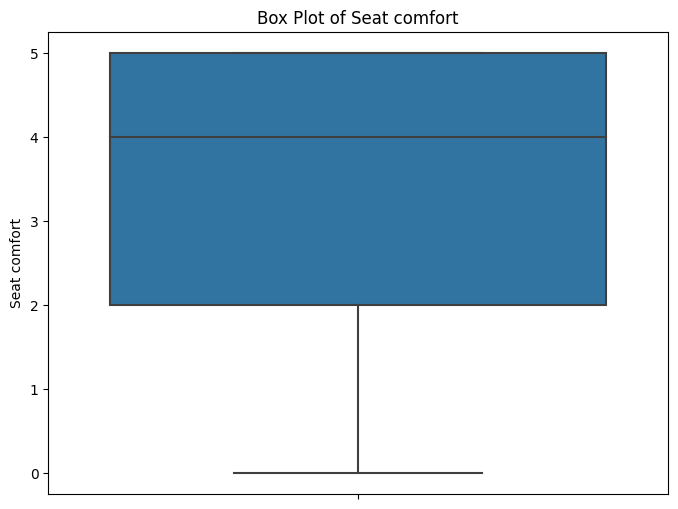

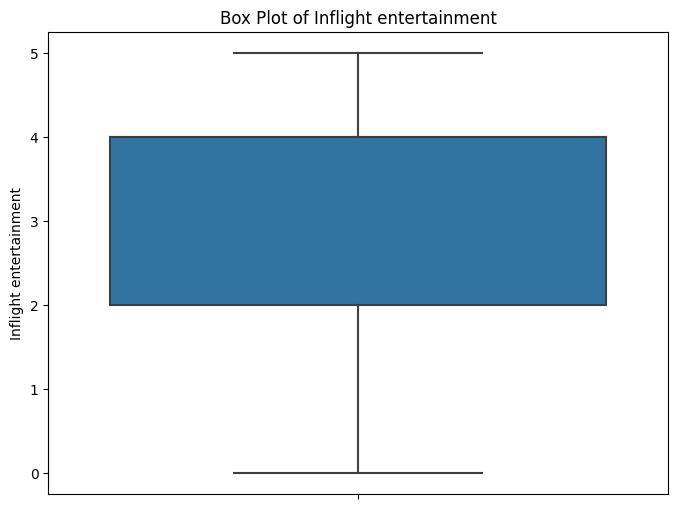

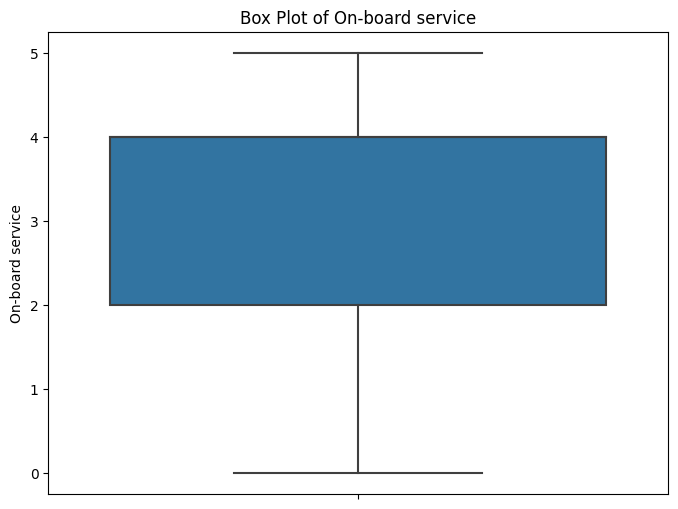

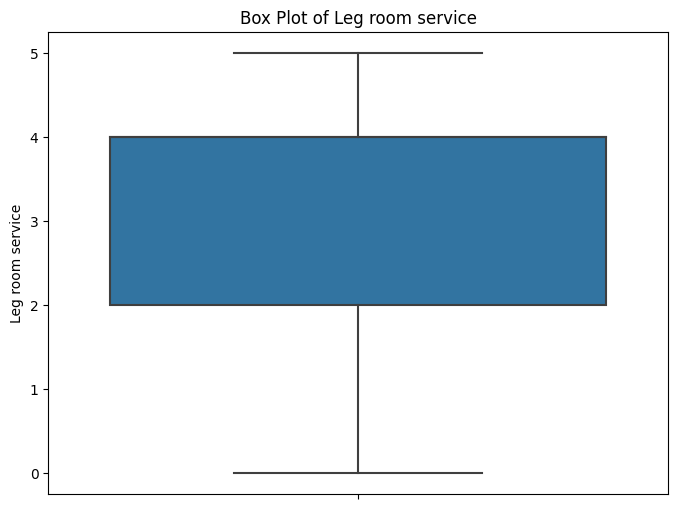

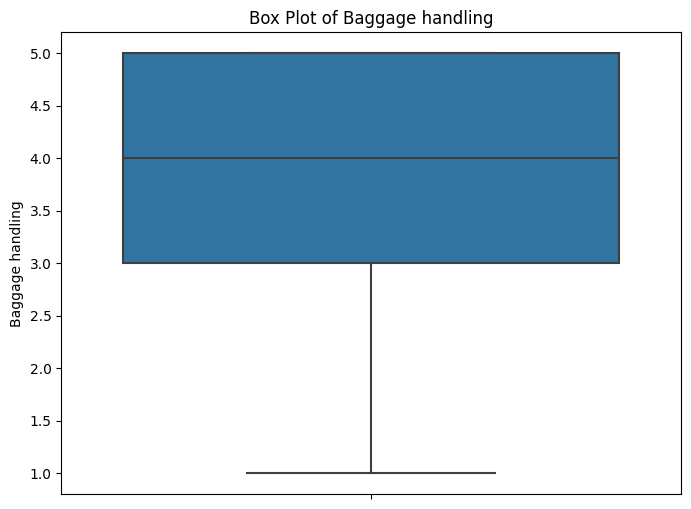

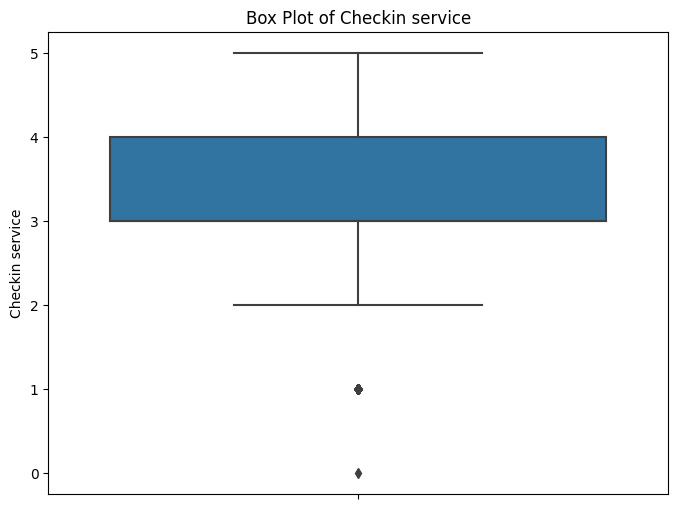

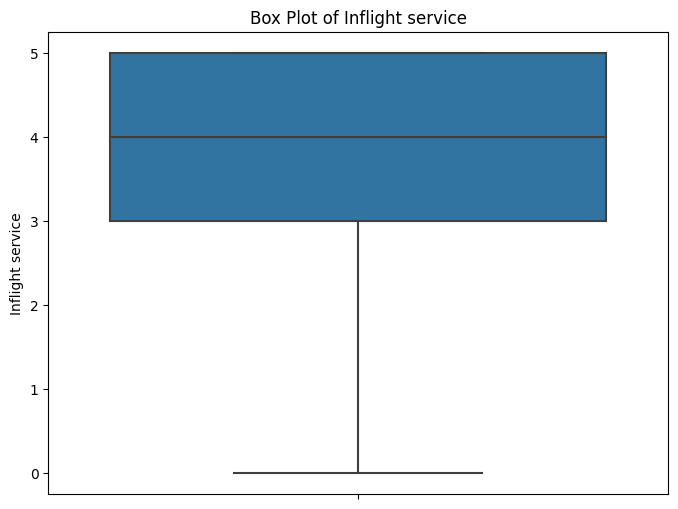

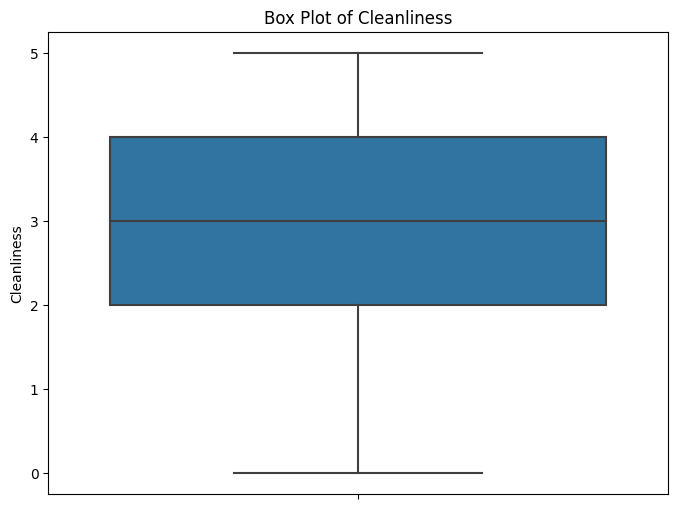

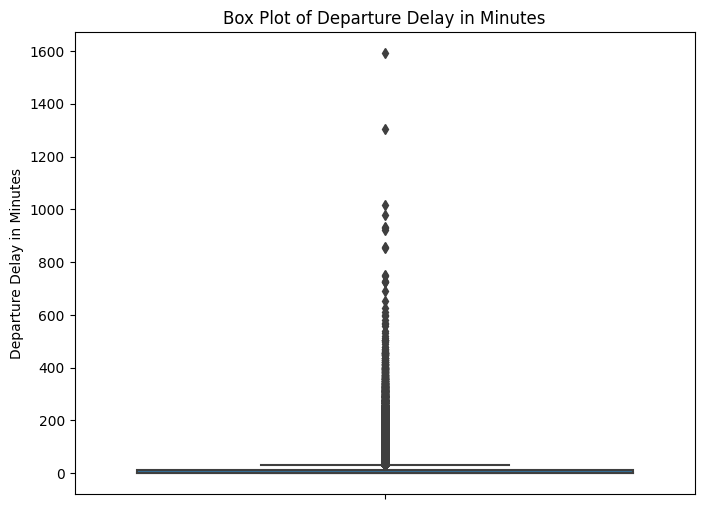

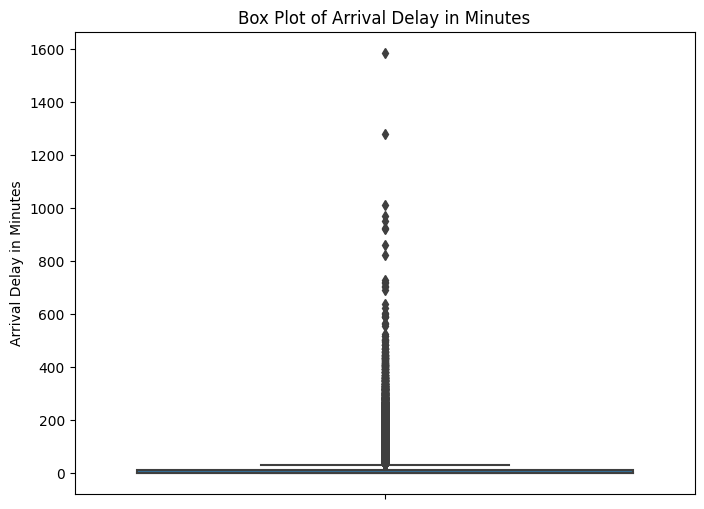

In [19]:
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=train_data, y=column)
    plt.title(f"Box Plot of {column}")
    plt.ylabel(column)
    plt.show()

Load data

In [20]:
# Load the training data
train_data = pd.read_csv('/kaggle/input/foreseeing-traveler-contentment/train.csv')

Replacing null values with mean

In [21]:
# Calculate the mean of the 'Arrival Delay in Minutes' column
mean_arrival_time = train_data['Arrival Delay in Minutes'].mean()

# Replace null values in the 'Arrival Delay in Minutes' column with the mean
train_data['Arrival Delay in Minutes'].fillna(mean_arrival_time, inplace=True)

Label / Output

In [22]:
X = train_data.iloc[:, 2:24]
y = train_data['contentment']

Null values repace with average

In [23]:
# print(train_data.isna().sum())
# train_data.dropna(inplace=True)

# Calculate the mean of the 'arrival_time' column
mean_arrival_time = train_data['Arrival Delay in Minutes'].mean()

# Replace null values in the 'arrival_time' column with the mean
train_data['Arrival Delay in Minutes'].fillna(mean_arrival_time, inplace=True)
X = train_data.iloc[:, 2:24]
y=train_data['contentment']
X

,Gender,Traveler Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Traveler,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,Male,disloyal Traveler,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,Female,Loyal Traveler,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,Female,Loyal Traveler,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,Male,Loyal Traveler,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Traveler,23,Business travel,Eco,192,2,1,2,3,...,2,2,3,1,4,2,3,2,3,0.0
103900,Male,Loyal Traveler,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,5,4,0,0.0
103901,Male,disloyal Traveler,30,Business travel,Business,1995,1,1,1,3,...,5,4,3,2,4,5,5,4,7,14.0
103902,Female,disloyal Traveler,22,Business travel,Eco,1000,1,1,1,5,...,1,1,4,5,1,5,4,1,0,0.0


Convert category to boolean columns

In [24]:
X = pd.get_dummies(X, columns=['Gender', 'Traveler Type', 'Type of Travel', 'Class'])

Train test split

In [25]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
clf = RandomForestClassifier(n_estimators=125, random_state=96)
# 
# clf = DecisionTreeClassifier(random_state=42)
# clf = GaussianNB()
clf.fit(X_train, y_train)


# Predict on the validation set
y_pred = clf.predict(X_val)

# Calculate the accuracy score
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy on the validation set:", accuracy)

Accuracy on the validation set: 0.9630912853086955


In [27]:
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy on the validation set:", accuracy)

Accuracy on the validation set: 0.8764255810596218


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
clf = clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy on the validation set:", accuracy)

Accuracy on the validation set: 0.7474135027188297


In [29]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy on the validation set:", accuracy)

Accuracy on the validation set: 0.9466820653481546


In [30]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy on the validation set:", accuracy)

Accuracy on the validation set: 0.8476492950291131


XGboost

In [31]:
# Encode 'contentment' column to binary labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Now you can use XGBoost with the binary labels
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train_encoded)
y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val_encoded, y_pred)
print("Accuracy with XGBoost on the validation set:", accuracy)

Accuracy with XGBoost on the validation set: 0.9624657138732496


Training on entire data

In [32]:
clf = RandomForestClassifier(n_estimators=125, random_state=96)
clf.fit(X,y)

RandomForestClassifier(n_estimators=125, random_state=96)

Running model on test data

In [33]:
test_data=pd.read_csv('/kaggle/input/foreseeing-traveler-contentment/test.csv')
# Calculate the mean of the 'arrival_time' column
mean_arrival_time = test_data['Arrival Delay in Minutes'].mean()

# Replace null values in the 'arrival_time' column with the mean
test_data['Arrival Delay in Minutes'].fillna(mean_arrival_time, inplace=True)


X_test = test_data.iloc[:, 2:24]
X_test = pd.get_dummies(X_test, columns=['Gender','Traveler Type','Type of Travel','Class'])

# # Replace NaN values with 0
# X_test = X_test.fillna(0)


Y_pred = clf.predict(X_test)
Y_pred = ["neutral or discontent" if entry == "discontent" else entry for entry in Y_pred]

Writing to file

In [34]:
submission = pd.DataFrame({'id': test_data['id'], 'contentment': Y_pred})
submission.to_csv('/kaggle/working/final.csv', index=False)
print("Completed")

Completed
